https://realpython.com/logistic-regression-python/

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Simple model

In [63]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [64]:
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x, y)
print(model1)
print(model1.classes_)
print(model1.predict_proba(x))

LogisticRegression(random_state=0, solver='liblinear')
[0 1]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


In [65]:
print(model1.predict(x))
print(y)
print(model1.score(x, y))

[0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1]
0.9


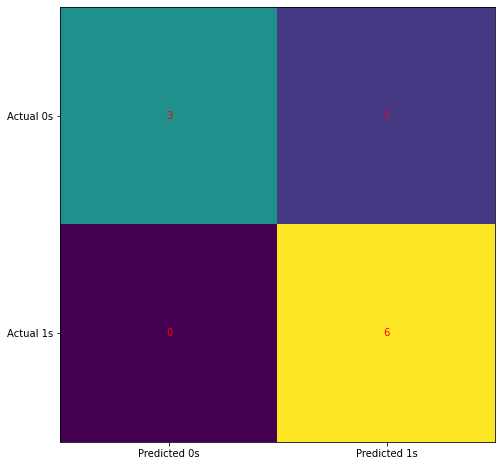

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [66]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(y, model.predict(x)))

## Improve the Model

You can improve your model by setting different parameters. For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:

In [67]:
# Step 2: Get data
# Use the previous data x and y

In [68]:
# Step 3: Create a model and train it
model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model2.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [69]:
# Step 4: Evaluate the model
p_pred = model2.predict_proba(x)
y_pred = model2.predict(x)
score_ = model2.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [70]:
print(y, y_pred)
print(p_pred)
print(score_)

[0 0 0 0 1 1 1 1 1 1] [0 0 0 0 1 1 1 1 1 1]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
1.0


In [71]:
print(conf_m)
print(report)

[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

